# Assignment 2
## Title: Exploring Data with Pandas

Name: Pranjal Rane

NUID: 002756852

In [1]:
# To get the Data uncomment and run below given 3 cells. If you already have the data, no need to run the below 3 cells

In [2]:
# !wget https://archive.ics.uci.edu/static/public/186/wine+quality.zip

In [3]:
# !unzip wine+quality.zip

In [4]:
# !wget http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Objective 1
Wine Quality Dataset

In [6]:
data_red_wine = pd.read_csv('wine+quality/winequality-red.csv', sep=';')
data_white_wine = pd.read_csv('wine+quality/winequality-white.csv', sep=';')

In [7]:
data_red_wine['wineType'] = 'red'
data_white_wine['wineType'] = 'white'

In [8]:
data = pd.concat([data_red_wine, data_white_wine], ignore_index=True)
data.sample(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5860            6.0              0.31         0.27            2.30      0.042   
5036            6.7              0.40         0.22            8.80      0.052   
4387            6.9              0.40         0.42            6.20      0.066   
4943            6.9              0.38         0.29           13.65      0.048   
3737            5.5              0.24         0.32            8.70      0.060   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
5860                 19.0                 120.0  0.98952  3.32       0.41   
5036                 24.0                 113.0  0.99576  3.22       0.45   
4387                 41.0                 176.0  0.99552  3.12       0.54   
4943                 52.0                 189.0  0.99784  3.00       0.60   
3737                 19.0                 102.0  0.99400  3.27       0.31   

      alcohol  quality wineType  
5860     12.7        7    white  
5036      9.4        5    white  
4387      9.4        5    white  
4943      9.5        6    white  
3737     10.4        5    white

#### Objective 1.1
Summary Statistics
Compute and display summary statistics for each feature available in the dataset. These must include:
1) minimum value
2) maximum value
3) mean
4) range
5) standard deviation
6) variance
7) count
8) 25:50:75 percentiles.

In [9]:
summary_statistics = data.describe(include='number')
numeric_data = data.select_dtypes(include='number')
summary_statistics.loc['range'] = numeric_data.max() - numeric_data.min()
summary_statistics.loc['variance'] = numeric_data.var()

summary_statistics

fixed acidity  volatile acidity  citric acid  residual sugar  \
count       6497.000000       6497.000000  6497.000000     6497.000000   
mean           7.215307          0.339666     0.318633        5.443235   
std            1.296434          0.164636     0.145318        4.757804   
min            3.800000          0.080000     0.000000        0.600000   
25%            6.400000          0.230000     0.250000        1.800000   
50%            7.000000          0.290000     0.310000        3.000000   
75%            7.700000          0.400000     0.390000        8.100000   
max           15.900000          1.580000     1.660000       65.800000   
range         12.100000          1.500000     1.660000       65.200000   
variance       1.680740          0.027105     0.021117       22.636696   

            chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count     6497.000000          6497.000000           6497.000000  6497.000000   
mean         0.056034            30.525319            115.744574     0.994697   
std          0.035034            17.749400             56.521855     0.002999   
min          0.009000             1.000000              6.000000     0.987110   
25%          0.038000            17.000000             77.000000     0.992340   
50%          0.047000            29.000000            118.000000     0.994890   
75%          0.065000            41.000000            156.000000     0.996990   
max          0.611000           289.000000            440.000000     1.038980   
range        0.602000           288.000000            434.000000     0.051870   
variance     0.001227           315.041192           3194.720039     0.000009   

                   pH    sulphates      alcohol      quality  
count     6497.000000  6497.000000  6497.000000  6497.000000  
mean         3.218501     0.531268    10.491801     5.818378  
std          0.160787     0.148806     1.192712     0.873255  
min          2.720000     0.220000     8.000000     3.000000  
25%          3.110000     0.430000     9.500000     5.000000  
50%          3.210000     0.510000    10.300000     6.000000  
75%          3.320000     0.600000    11.300000     6.000000  
max          4.010000     2.000000    14.900000     9.000000  
range        1.290000     1.780000     6.900000     6.000000  
variance     0.025853     0.022143     1.422561     0.762575

#### Objective 1.2 
Data Visualization

Histograms: To illustrate the feature distributions, create a histogram for each feature in the dataset. You may plot each histogram individually or combine them all into a single plot. When generating histograms for this assignment, use the default number of bins. Recall that a histogram provides a graphical representation of the distribution of the data.

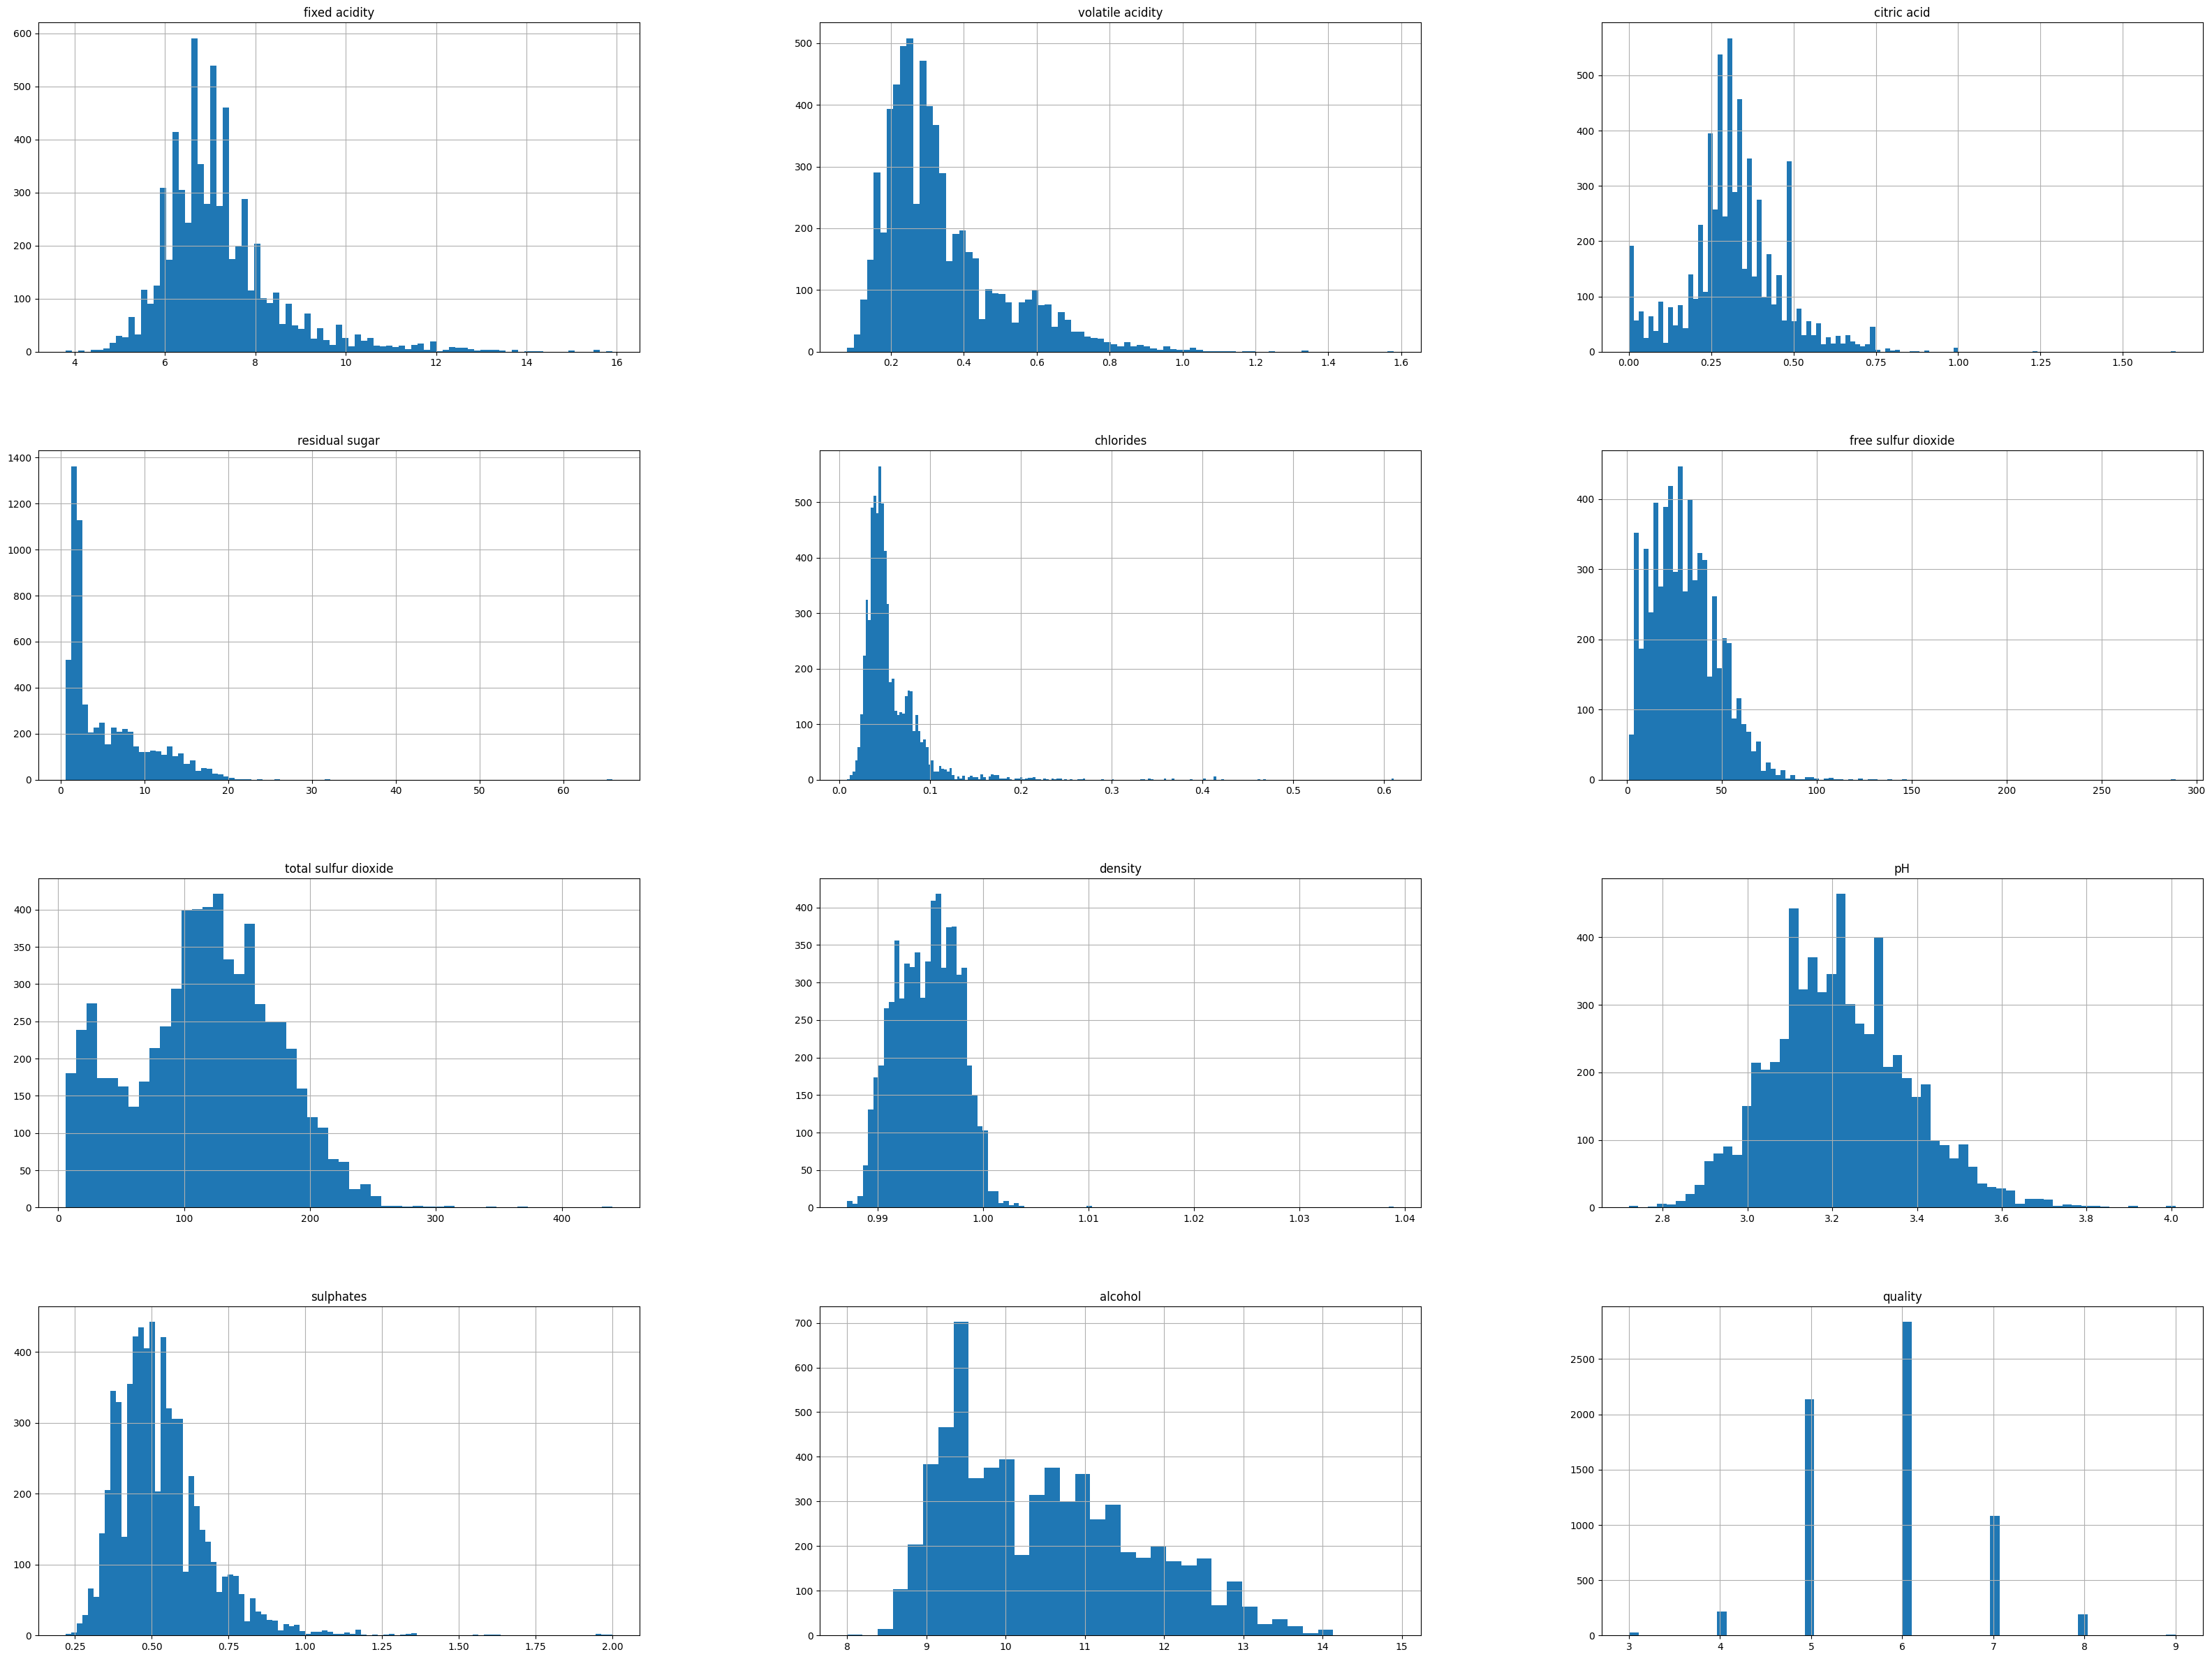

In [10]:
data.hist(bins='auto', figsize=(40,30))
plt.show()

Box Plots: To further assess the data, create a boxplot for each feature in the dataset. All of the boxplots will be combined into a single plot. Recall that a boxplot provides a graphical representation of the location and variation of the data through their quartiles; they are especially useful for comparing distributions and identifying outliers.

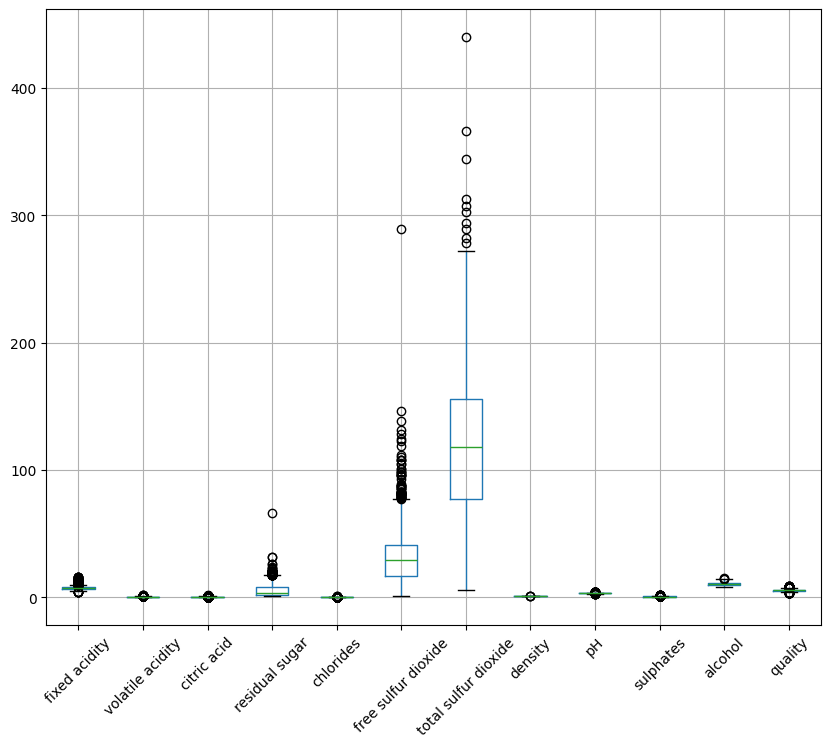

In [11]:
plt.figure(figsize=(10, 8))
data.boxplot()
plt.xticks(rotation=45) 
plt.show()

Pairwise Plot: To understand the relationship between the features, create scatter plot for each pair of the features. If there are n features in the dataset, there should be nC2 plots.

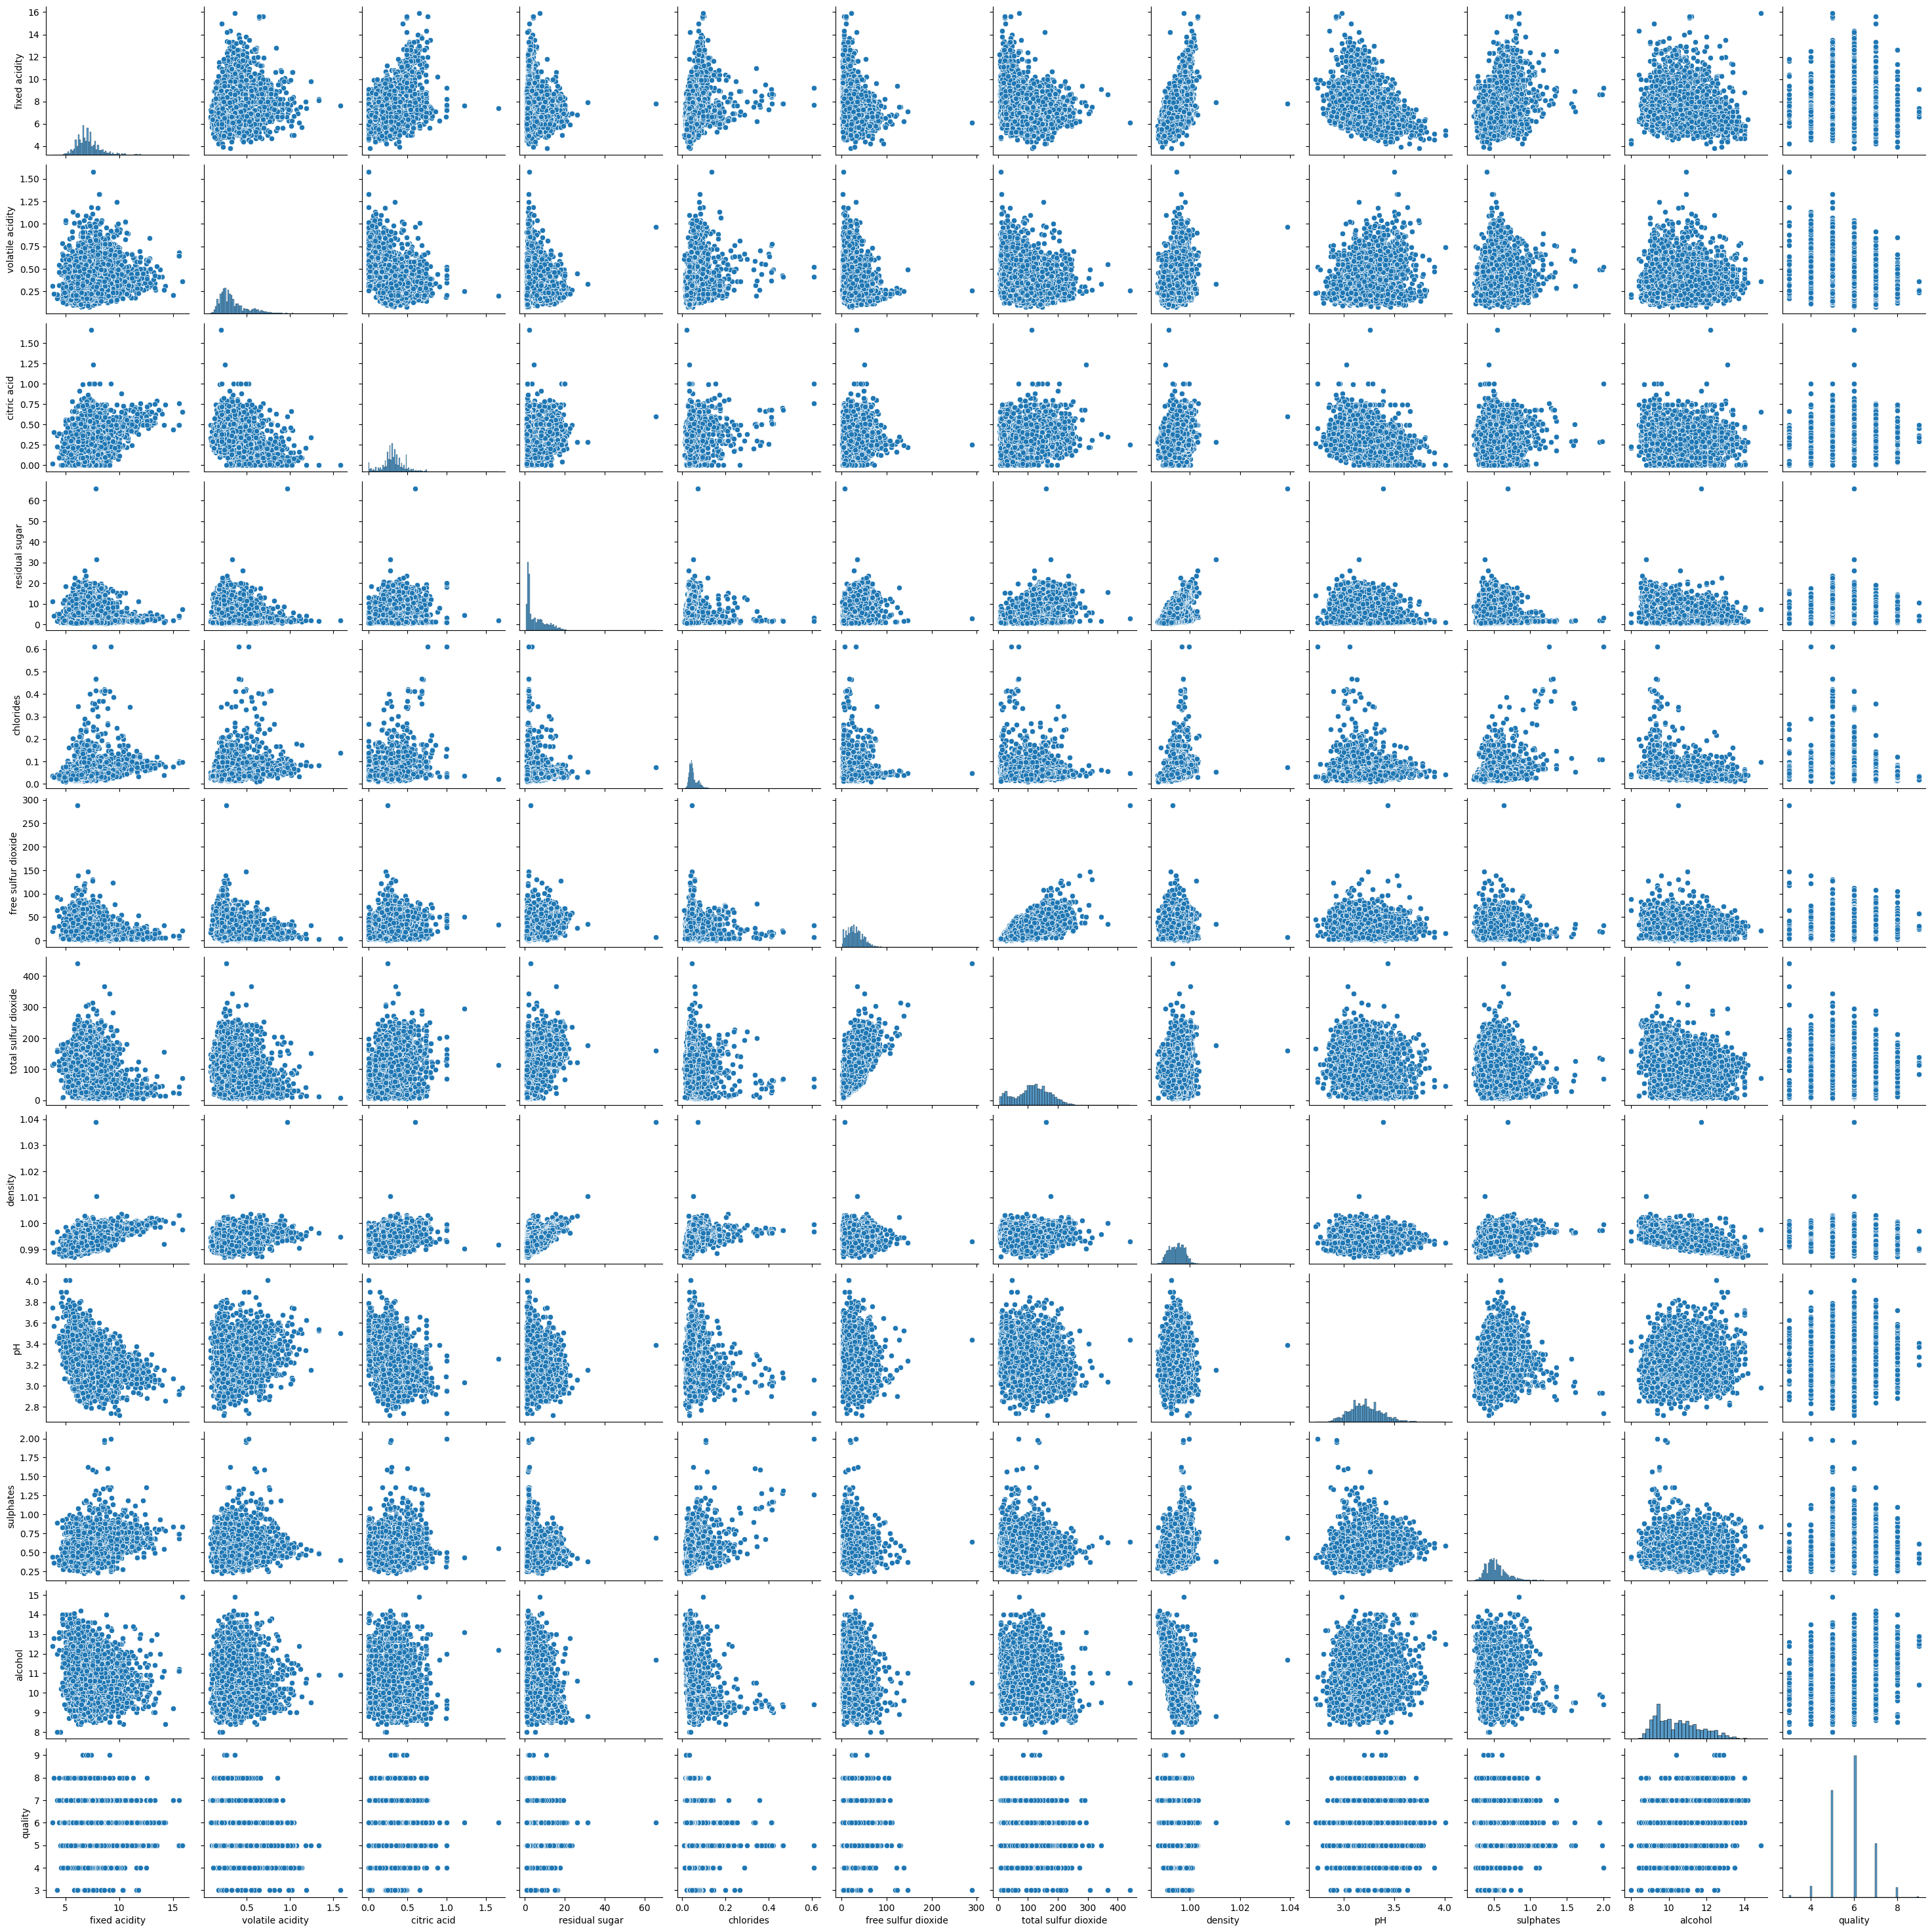

In [12]:
sns.pairplot(numeric_data)
plt.show()

Class-wise Visualization: Create pairwise plots for each pair of features in a similar way for each of the different classes present in the data.

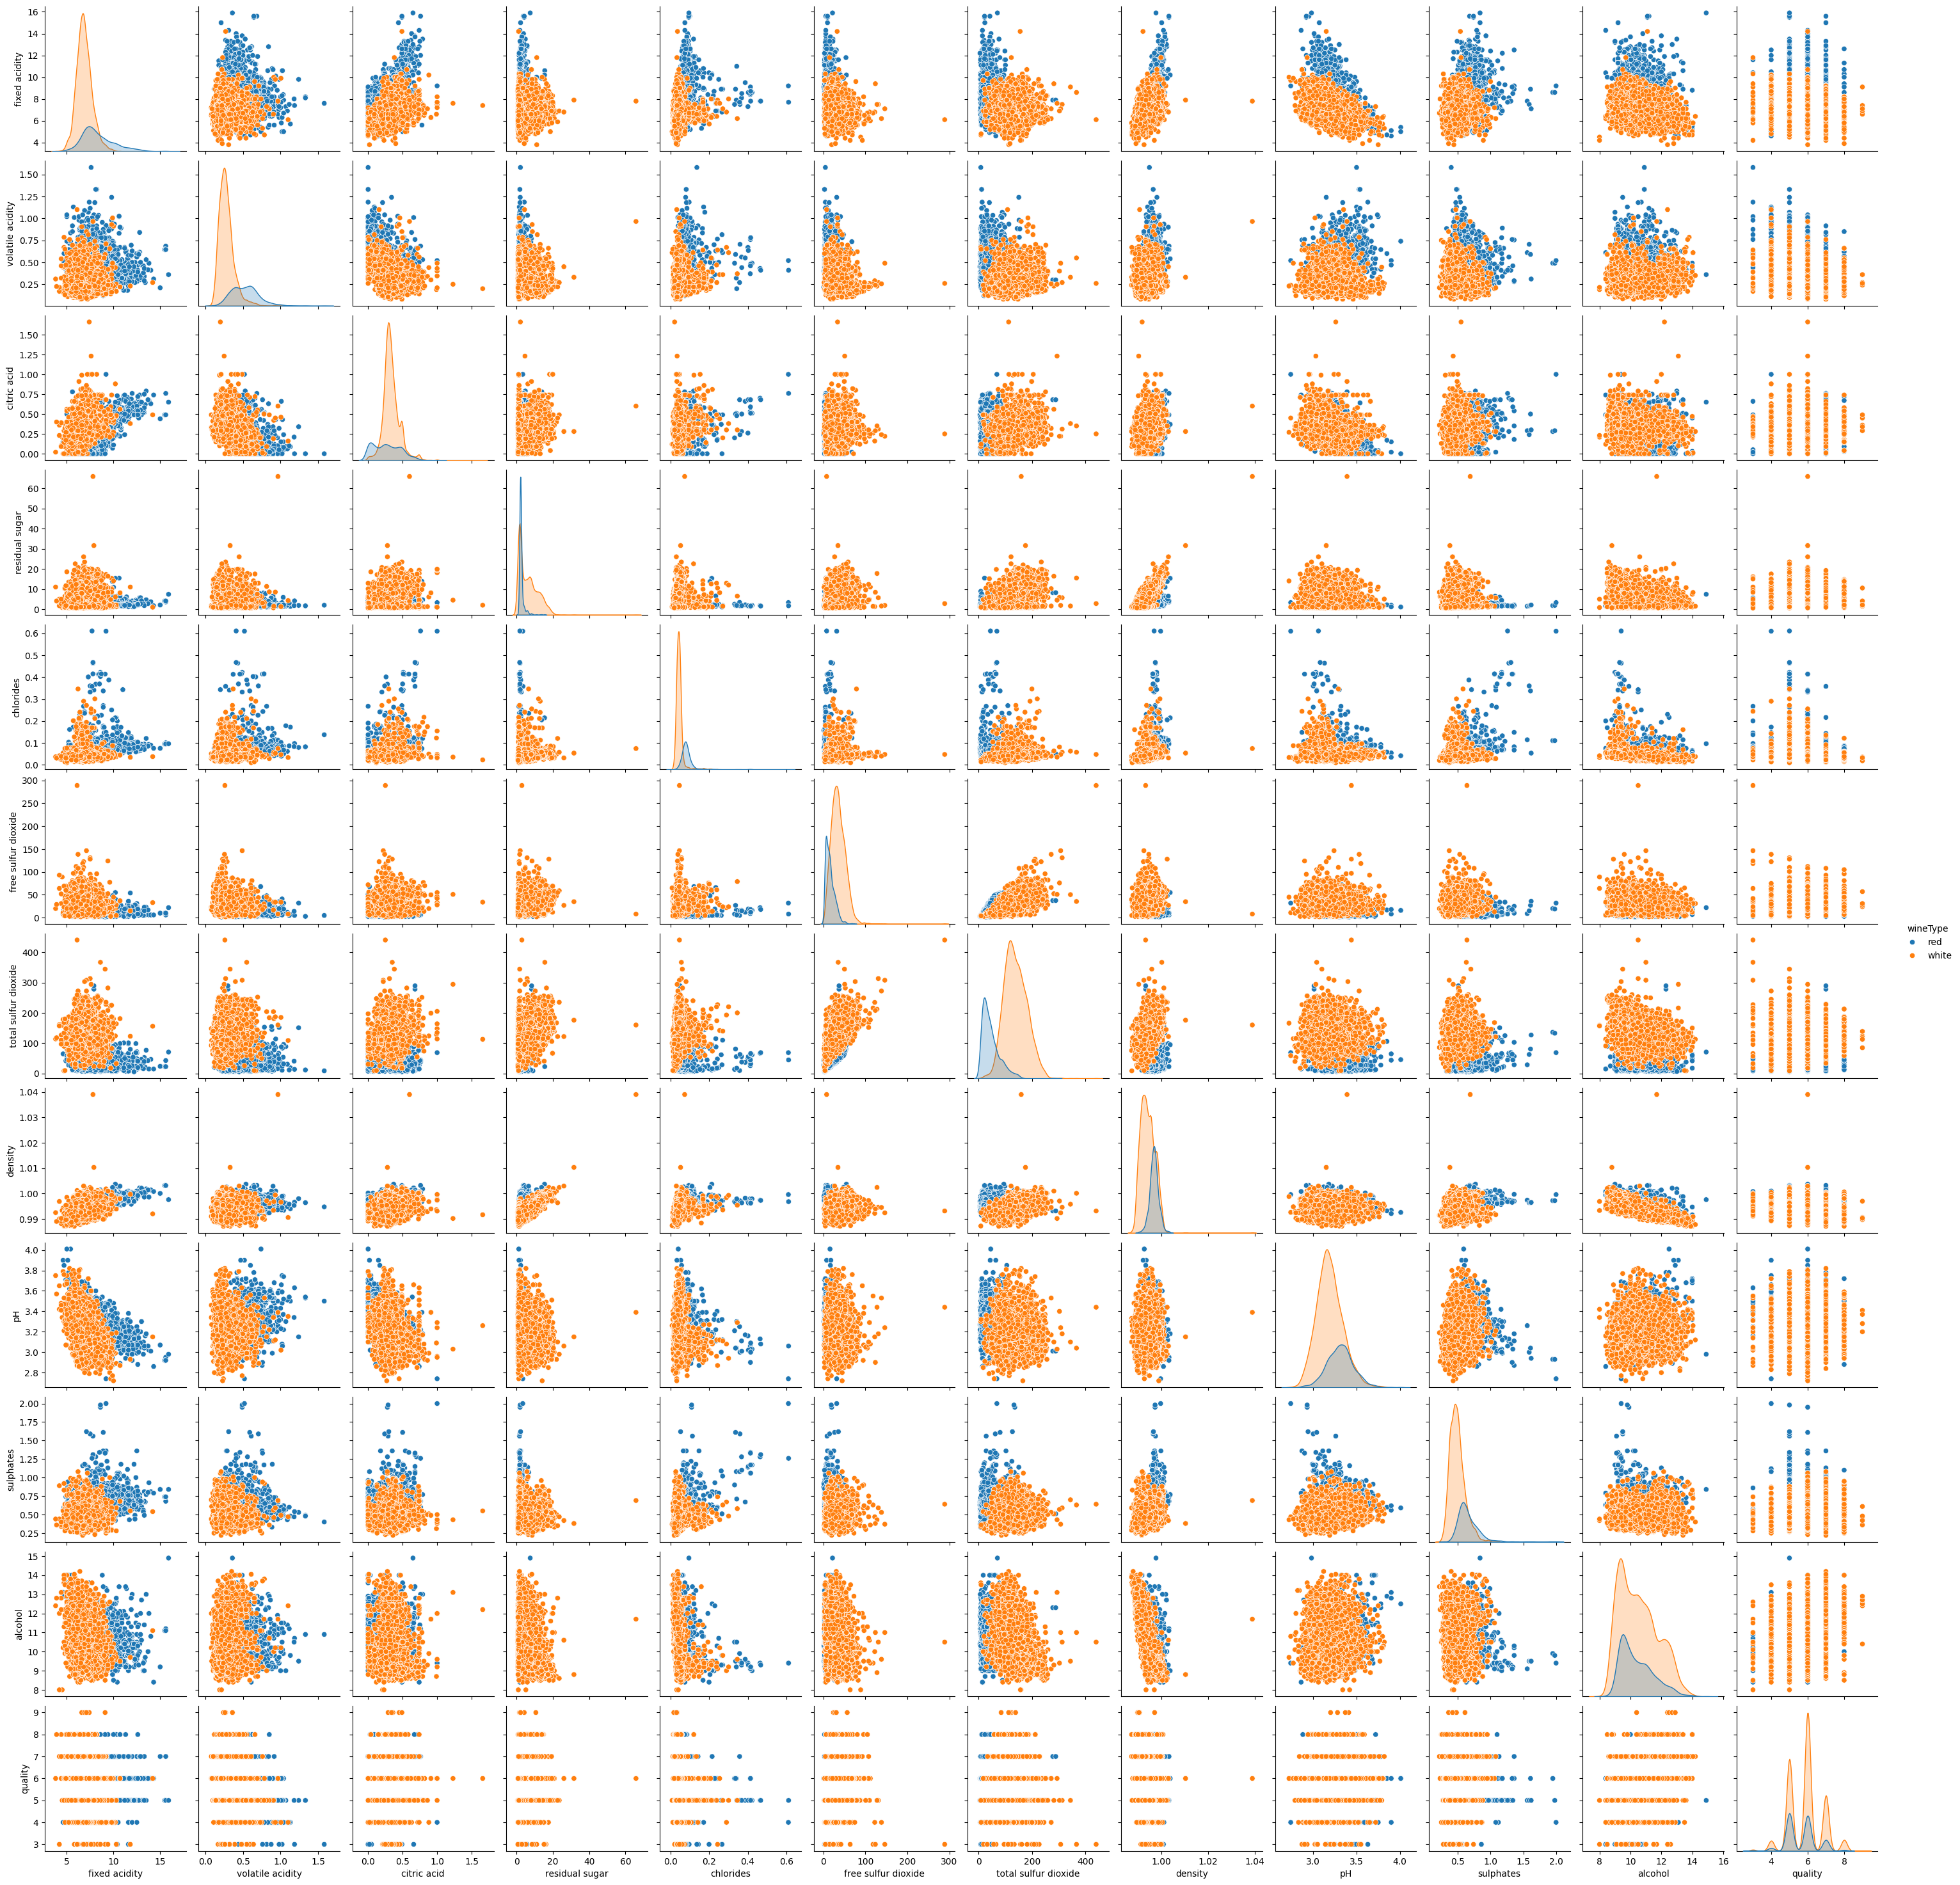

In [13]:
sns.pairplot(data, hue="wineType")
plt.show()

#### Objective 1.3 
Conceptual Questions

1. How many features are there? What are the types of the features (e.g., numeric, nominal, discrete, continuous)?
  
   There are a total of 13 features in the given wine dataset. They are:
   
   - fixed acidity - Continuous
   - volatile acidity - Continuous
   - citric acid - Continuous
   - residual sugar - Continuous
   - chlorides - Continuous
   - free sulfur dioxide - Continuous
   - total sulfur dioxide - Continuous
   - density - Continuous
   - pH - Continuous
   - sulphates - Continuous
   - alcohol - Continuous
   - quality - Discrete
   - wineType - Nominal


2. What can you conclude from the histograms about the distribution of the features in the dataset? Are there any features that are approximately normally distributed? Are there any features that are highly skewed?

   Histograms provide crucial insights into the distribution of features in a dataset. They allow us to understand the nature of the distribution, be it normal or skewed, by examining the arrangement of the data. The width or range of the histogram sheds light on the data's variability or spread. Moreover, histograms are instrumental in identifying outliers, which are the unusual values that stand apart from the bulk of the data.

   The distribution of features based on the histograms -
   - chlorides - Highly Skewed (Right skewed)
   - pH - Normally Distributed
   - residual sugar - Highly Skewed (Right skewed)
   - free sulfur dioxide - Highly Skewed (Right skewed)

3. Based on the box plots, are there any features that appear to have many outliers? Are there any features that appear to have a similar spread of values across different quality ratings? Are there any features that appear to have different spreads of values across different quality ratings?

   Features that are exhibiting a notable abundance of outliers are:
   - sulfates
   - chlorides
   - citric acid
   - free sulfur dioxide
   - fixed acidity
   - residual sugar
   - volatile acidity.

   Features that are displaying comparable ranges of values are:
   - citric acid
   - sulfates
   - fixed acidity
   - pH.

   Features that have dissimilar ranges of values are:
   - free sulfur dioxide
   - residual sugar
   - quality
   - chlorides alcohol

4. Based on the pairwise plots, which features appear to be highly correlated? Are there any features that do not appear to be correlated with any other features?

   Features that are exhibiting strong correlations are:
   - density and residual sugar
   - free sulfur dioxide and total sulfur dioxide

   Features that are not exhibiting any significant correlations with other features are:
   - residual sugar
   - alcohol
   - total sulfur dioxide


5. Based on the class-wise visualizations, are there any pairs of features that appear to be more correlated for certain wine types than for others?

   For red wine, these pairs exhibit higher correlations compared to white wine:

    - Citric acid and fixed acidity
    - Density and fixed acidity
    - Chlorides and sulfates

   On the other hand, for red wine, the following pairs are more correlated than for white wine:
   - Density and residual sugar
   - Total sulfur dioxide and density
   - Total sulfur dioxide and residual sugar

### Objective 2

Forest Fires Dataset

In [14]:
data_2 = pd.read_csv('forestfires.csv')
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wineType  
0      9.4        5      red  
1      9.8        5      red  
2      9.8        5      red  
3      9.8        6      red  
4      9.4        5      red

#### Objective 2.1

Summary Statistics

In [15]:
summary_statistics_2 = data_2.describe(include='number')
numeric_data_2 = data_2.select_dtypes(include='number')
summary_statistics_2.loc['range'] = numeric_data_2.max() - numeric_data_2.min()
summary_statistics_2.loc['variance'] = numeric_data_2.var()

summary_statistics_2

X           Y        FFMC          DMC            DC  \
count     517.000000  517.000000  517.000000   517.000000    517.000000   
mean        4.669246    4.299807   90.644681   110.872340    547.940039   
std         2.313778    1.229900    5.520111    64.046482    248.066192   
min         1.000000    2.000000   18.700000     1.100000      7.900000   
25%         3.000000    4.000000   90.200000    68.600000    437.700000   
50%         4.000000    4.000000   91.600000   108.300000    664.200000   
75%         7.000000    5.000000   92.900000   142.400000    713.900000   
max         9.000000    9.000000   96.200000   291.300000    860.600000   
range       8.000000    7.000000   77.500000   290.200000    852.700000   
variance    5.353568    1.512655   30.471624  4101.951889  61536.835467   

                 ISI        temp          RH        wind        rain  \
count     517.000000  517.000000  517.000000  517.000000  517.000000   
mean        9.021663   18.889168   44.288201    4.017602    0.021663   
std         4.559477    5.806625   16.317469    1.791653    0.295959   
min         0.000000    2.200000   15.000000    0.400000    0.000000   
25%         6.500000   15.500000   33.000000    2.700000    0.000000   
50%         8.400000   19.300000   42.000000    4.000000    0.000000   
75%        10.800000   22.800000   53.000000    4.900000    0.000000   
max        56.100000   33.300000  100.000000    9.400000    6.400000   
range      56.100000   31.100000   85.000000    9.000000    6.400000   
variance   20.788832   33.716898  266.259802    3.210019    0.087592   

                 area  
count      517.000000  
mean        12.847292  
std         63.655818  
min          0.000000  
25%          0.000000  
50%          0.520000  
75%          6.570000  
max       1090.840000  
range     1090.840000  
variance  4052.063225

#### Objective 2.2

Data Visualization

As done in Section 1, create histograms and boxplots for the dataset. Now, create another boxplot without the outliers. You can use showfliers=False to remove outliers from the boxplots. You are expected to present two Boxplots in total.

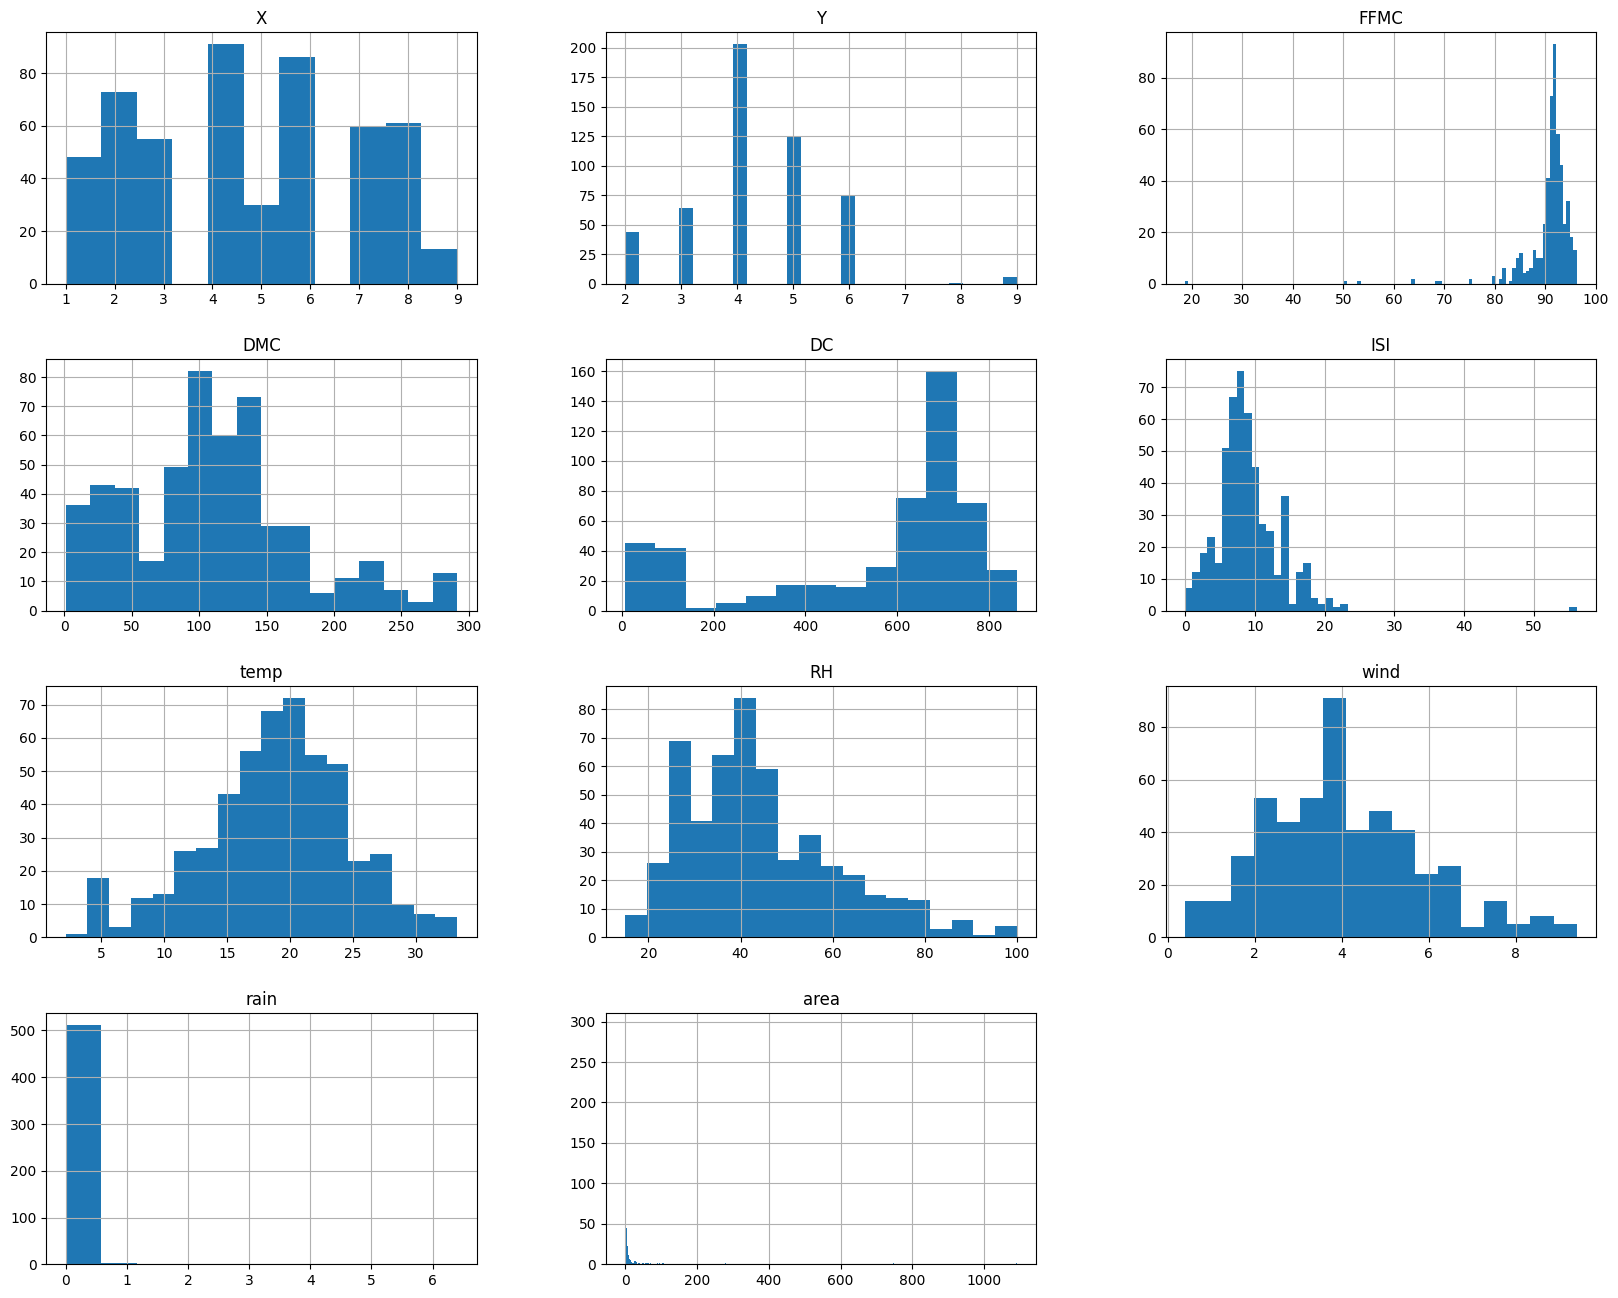

In [16]:
data_2.hist(bins='auto', figsize=(20,16))
plt.show()

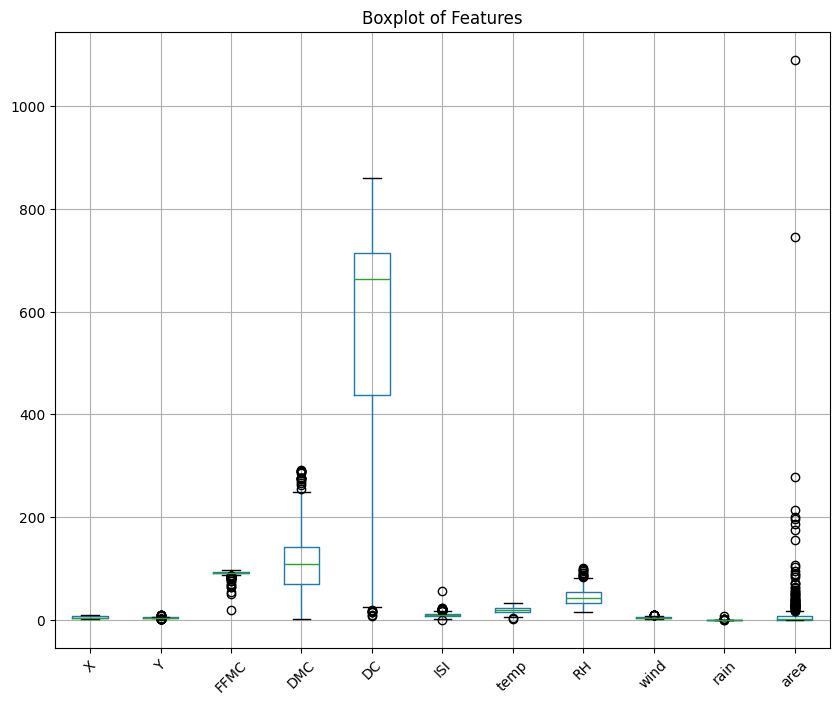

In [17]:
data_2.boxplot(figsize=(10, 8), showfliers=True)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

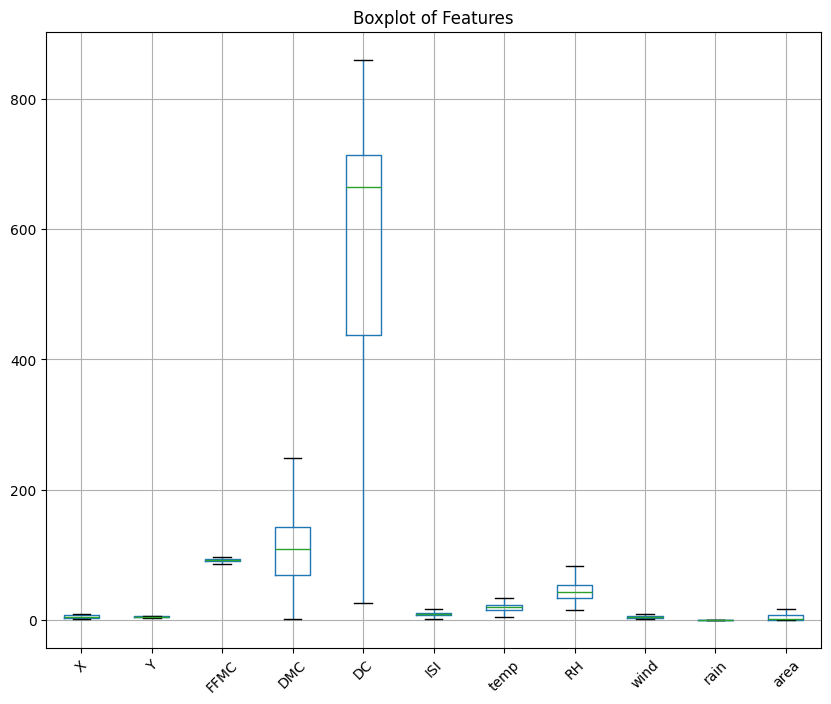

In [18]:
data_2.boxplot(figsize=(10, 8), showfliers=False)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

#### Objective 2.3 

Conceptual Questions

1. From the boxplot without outliers, which features has a significantly different distribution from others? Why?

   Features that have a significantly different distribution from others are :
   - X
   - Y
   - DC
   - rain
   - area
  
   
   Outliers significantly impact the distribution of a feature and its respective boxplot representation. They can induce skewness, extend the boxplot's range, and shift the median, resulting in marked differences in distribution compared to features with fewer outliers. Features with a higher occurrence of outliers may exhibit wider ranges, extended whiskers, and increased variances, indicating potential substantial departures from the trends seen in other features.

2. What does the outlier in the features mean? If you remove the outliers from the dataset, what problems might arise?

   Outliers, which stand out significantly from the rest of the data, can profoundly influence analyses and model building. They have the potential to warp statistical measures, alter distribution shapes, influence correlations and regression lines, and affect the performance of predictive models. However, indiscriminately discarding these outliers can introduce bias, alter the perceived variability of the data, and lead to the loss of critical information. Not every outlier represents a mistake; some are indicative of rare occurrences or substantial variations within the data. Therefore, it's crucial to carefully evaluate the nature of outliers before deciding to remove them. This approach helps retain essential information and ensures a thorough comprehension of the dataset. Outliers can challenge the assumptions underlying many models, potentially undermining the validity of the analyses that follow. Yet, eliminating these outliers can also limit the model's ability to generalize effectively when confronted with new data that may include similar outliers.

3. Create a histogram for only FFMC after removing all the values outside of range [88, 96].

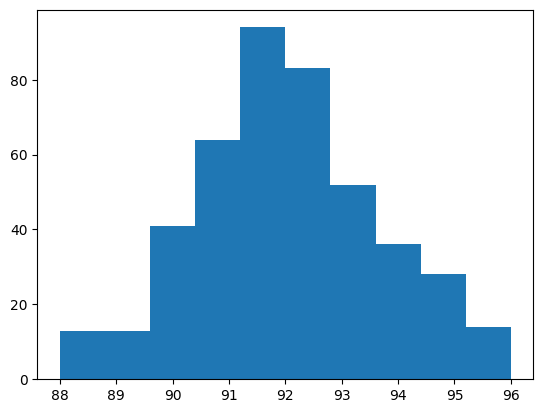

In [19]:
required_data = data_2[(data_2['FFMC'] >= 88) & (data_2['FFMC'] <= 96)]['FFMC']
plt.hist(required_data)
plt.show()

4. What distribution does the new histogram follow?

   The new histogram plotted for FFMC (range between 88 and 96) clearly follows normal distribution.